# Process Notebook 


*   **Author:** Ken (480219084)
*   **Reviewed by:** Lou, Andrew, Alex, Samantha (Week 9 Tutorial) 
*   **Created:** 14th Oct 2020
*   **Last edited:** 16 Nov 2020


## Driving Question 

The core goal this process notebook aims to achieve is to answer the question: "How deadly is COVID-19?  How can we present data about this question so that the uncertainty is made very clear to the user of the visualisation of the results?" 

The purpose of this notebook is to present data about this question, and document the processes used in the data analysis on the country **Malaysia**.  




# Libraries

The following are the libraries used in this process notebook:

In [ ]:
# beginning date: 29 Oct 2020
# end date: 29 Oct 2020
# author: Alex
%%capture
# require orca to save charts locally as static png images
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [36]:
# beginning date 14 Oct 2020
# end date: 4 Nov 2020

# Importing all the required libraries tha are used in this noteobok. 
import pandas as pd
import os
import shutil
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import random

print("pandas version: " + pd.__version__)
print("numpy version: " + np.__version__)
print("matplotlib version: " + matplotlib.__version__)

pandas version: 1.1.4
numpy version: 1.18.5
matplotlib version: 3.2.2


# Data Engineering
The dataset is a snapshot of the dataset from the 'Our World in Data' [github repository](https://github.com/owid/covid-19-data/tree/master/public/data). A copy of the dataset is stored on our team's Github repository, which may be a bit out of date as the dataset on their repository is updated regularly. 

The following code cell imports the data, and stores it in a Pandas dataframe.

In [ ]:
# beginning date 14 Oct 2020
# end date: 4 Nov 2020

# Loading in the data from our github repository - it has to be a raw.github link. 
#url = 'https://raw.github.sydney.edu.au/awon6941/DATA3406_Group4/master/data_raw/owid-covid-data.csv?token=AAAA7DSTK7F2J44OVYF7E427WMFWS' #has to be raw.github link 
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv" # link to the source github repo to use for testing when usyd's github is down
# Parse the dataset as a Pandas dataframe. 
df1 = pd.read_csv(url)

With the dataset successfully stored in a Pandas dataframe, the `head(3)` method can be used to then display the first 5 rows of the dataset. This was done to get a basic overview of the dataset, its contents, and also to check if the dataset was correctly loaded into the dataframe.  

In [ ]:
# beginning date 14 Oct 2020
# end date: 4 Nov 2020

# displays the first 3 rows of the dataframe  
df1.head(3) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,37.465,18.733,2.676,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN



Once it has been confirmed that the data was correctly loaded into the dataframe, we can have a quick look at the metadata of the dataset. 

In [ ]:
# beginning date 14 Oct 2020
# end date: 4 Nov 2020

# find the columns of the dataset and print it out.
print(df1.columns)

# adding a print statement as a linebreak in between as \n (for line break) didn't seem to work
print(" ")

# find the dimensions of the dataset and print it out.
print(df1.shape)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In the above code cell, the results of `print(df1.columns)` shows a list of all the columns present in the dataset, whilst the results of `print(df1.shape)` shows the dimensions of the dataset, that being **50090** rows with **41** columns. 

## Generating Test Dataset

Below is a code cell that is used to generate a test dataframe that mimics the actual dataset. This was created as part of a checklist task, and tested here before porting it over to the group's product notebook. Where it has been modified further to more closely mimic the actual dataset in the group's product notebook.

The purpose of this function is used to test other functions to ensure that they are working as intended and to also show that results were not hardcoded. 

In [ ]:
# beginning date: 6 Nov 2020
# end date: 7 Nov 2020
# author: Ken

# Generates a random dataset that mimics the actual dataset.
# Params: 
# iso_code : Select MYS, PHL, JPN or DEU (Germany) 
# start_date: the date to start generating from.
# end_date: the date to end on.
# max: set the max size for the randomly generated numbers. 
def generate_testdata(iso_code,start_date,end_date,max):

  # length of the generated dataset is based on date range (i.e. row length) 
  date = pd.date_range(start=start_date,end=end_date,freq='D')
  row_len = len(date)
  col_len = len(df1.columns) #take the columns from the actual dataset. 

  # generate a set of random integers to fill the dataframe with.
  data = np.random.randint(0, max, size = (row_len,col_len)) 
  df = pd.DataFrame(data,columns=df1.columns)
  
  # fill the dataframe with the range of dates generated.
  df['date'] = date

  # sort the data entries in order of dates. 
  df = df.sort_values(by='date')

  # select one of the iso_codes and fill with the associating data data
  if 'MYS' in iso_code:
    df['iso_code'] = 'MYS'
    df['location'] = 'Malaysia'
    df['continent'] = 'Asia'

  if 'PHL' in iso_code:
    df['iso_code'] = 'PHL'
    df['location'] = 'Philippines'
    df['continent'] = 'Asia'

  if 'JPN' in iso_code:
    df['iso_code'] = 'JPN'
    df['location'] = 'Japan'
    df['continent'] = 'Asia'

  if 'ITA' in iso_code:
    df['iso_code'] = 'ITA'
    df['location'] = 'Italy'
    df['continent'] = 'Europe'

  if 'DEU' in iso_code:
    df['iso_code'] = 'DEU'
    df['location'] = 'Germany'
    df['continent'] = 'Europe'

  #different random value ranges.
  rand_valA = random.randint(0,100)
  rand_valB = random.uniform(0,1)
  rand_valC = random.uniform(50,100)
  rand_valD = random.randint(0,10)
  rand_valE = random.uniform(0,50)

  # Assigning persistent values that are present in the dataset. 
  df['stringency_index'] =  rand_valA
  df['human_development_index'] = round(rand_valB,3)
  df['diabetes_prevalence'] = round(rand_valA,2)
  df['life_expectancy'] = round(rand_valC,2)
  df['hospital_beds_per_thousand'] = rand_valD
  df['male_smokers'] = rand_valE
  df['female_smokers'] = rand_valE
  df['extreme_poverty'] = round(rand_valB,2)
  df['population_density'] = round(rand_valA,3)
  df['aged_65_older'] = round(rand_valE,2)
  df['aged_70_older'] = rand_valD
  df['gdp_per_capita'] = round(rand_valA,3)
  df['cardiovasc_death_rate'] = round(rand_valE,2)
  df['median_age'] = round(rand_valE,2)

  df['total_cases'] = df['new_cases'].cumsum()
  df['total_deaths'] = df['new_cases'].cumsum()
  df['total_tests'] = df['new_tests'].cumsum()
  #return the filled dataset. 
  return df

# Example usage of the function to generate a dataset for Malaysia, 
# from the 1st of Jan 2021 to 1st of Jan 2022. 
dfMy = generate_testdata("MYS","2021-01-01", "2022-01-01", 5000)
dfMy

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,MYS,Asia,Malaysia,2021-01-01,1161,1161,1182,1161,2580,652,4625,2249,583,1327,1032,4987,3313,4114,3129,454,2751,2479,4106,2890,1187,2825,2825,1456,2911,446,4187,823,4395,1258,29,2404,29,27.3,27.3,0,29,0.76,27.3,29,27.297266,27.297266,597,0,67.29,0.763
1,MYS,Asia,Malaysia,2021-01-02,3953,2792,3608,3953,1576,1481,3897,4961,1290,1073,1190,431,902,2978,4799,1629,209,382,4960,3465,2829,5943,3118,2790,4883,3708,2860,4299,346,3833,29,4817,29,27.3,27.3,0,29,0.76,27.3,29,27.297266,27.297266,1486,0,67.29,0.763
2,MYS,Asia,Malaysia,2021-01-03,8135,4182,4252,8135,1117,1764,3446,1912,3613,3081,2836,445,2438,2543,1965,4561,45,4822,1357,2565,1439,7652,1709,2403,3410,4634,3718,4249,2719,353,29,53,29,27.3,27.3,0,29,0.76,27.3,29,27.297266,27.297266,4594,0,67.29,0.763
3,MYS,Asia,Malaysia,2021-01-04,8181,46,401,8181,2913,47,1111,4783,2356,4337,969,3888,1760,2918,1215,2192,3306,1263,2429,964,2114,12067,4415,4209,1548,3464,4681,735,3798,2360,29,2247,29,27.3,27.3,0,29,0.76,27.3,29,27.297266,27.297266,1851,0,67.29,0.763
4,MYS,Asia,Malaysia,2021-01-05,11521,3340,1553,11521,328,3084,1409,2882,4652,1519,3375,4911,2253,2030,397,256,2157,1183,2369,2211,1961,12251,184,3589,296,3144,988,4730,981,3988,29,2967,29,27.3,27.3,0,29,0.76,27.3,29,27.297266,27.297266,430,0,67.29,0.763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,MYS,Asia,Malaysia,2021-12-28,927262,2608,3802,927262,850,246,731,4164,4533,3814,1310,1964,393,2404,4811,396,191,4608,2969,3424,3461,867414,3191,763,4609,2516,1449,2197,1897,761,29,2291,29,27.3,27.3,0,29,0.76,27.3,29,27.297266,27.297266,699,0,67.29,0.763
362,MYS,Asia,Malaysia,2021-12-29,928120,858,2509,928120,2444,1659,681,3481,3392,1215,229,18,3428,4932,4050,1848,404,4510,3838,4444,5,870886,3472,4134,1319,1698,3007,2844,2144,1324,29,1665,29,27.3,27.3,0,29,0.76,27.3,29,27.297266,27.297266,4250,0,67.29,0.763
363,MYS,Asia,Malaysia,2021-12-30,932562,4442,1279,932562,1193,2629,4786,4419,3201,471,4368,558,2984,4742,51,4034,1449,2471,1600,1272,61,872525,1639,2987,2894,2133,2421,4542,4796,4838,29,3548,29,27.3,27.3,0,29,0.76,27.3,29,27.297266,27.297266,1488,0,67.29,0.763
364,MYS,Asia,Malaysia,2021-12-31,934553,1991,4142,934553,2726,4773,2768,4886,1853,697,420,2586,91,3273,997,266,4476,1035,1024,600,1321,876749,4224,4116,257,87,1223,2721,2269,4945,29,4231,29,27.3,27.3,0,29,0.76,27.3,29,27.297266,27.297266,4949,0,67.29,0.763


## Cleaning the data

Before getting on with any data analysis, the data set would need to be cleaned. 

The code cell below is provided by my teammate Alex who has provided his method of cleaning the data and has shared it with the group. The details of how this is done are located in his[ process notebook](https://github.sydney.edu.au/awon6941/DATA3406_Group4/blob/master/process_notebooks/Alex_Process_Notebook.ipynb) which is located on our GitHub repository. 

In [ ]:
# beginning date: 29 Oct 2020
# end date: 11 Nov 2020
# author: Alex

# scale huge numbers down
df1['population (million)'] = df1['population'].astype(float)/1000000

# justify rationale and convert significant figures
dfClean = df1.round({'population': -3, # nearest thousand
                      'aged_65_older': 1,
                      'aged_70_older': 1,
                      'gdp_per_capita': 2, # dollars
                      'extreme_poverty': 2, # since it is an extremely small number
                      'diabetes_prevalence': 1,
                      'female_smokers': 1,
                      'male_smokers': 1,
                      'handwashing_facilities': 1,
                      'hospital_beds_per_thousand': 1, # because some countries only 0.5
                      'human_development_index': 2, # normalized number from 0 to 1
                      'population (million)': 3, # nearest thousand,
                      'population_density': 0,
                      'median_age': 0,
                      'cardiovasc_death_rate': 0, # number of deaths, not percentage
                      'life_expectancy': 0,
                      })

# remove outliers
dfClean['human_development_index'] = dfClean['human_development_index'].clip(0, 1)
zeroToHundred = ['positive_rate', # percentage
                 'stringency_index',
                 'median_age', # cant be older than 100
                 'life_expectancy', # cant be older than 100
                 'aged_65_older', # percentage
                 'aged_70_older', # percentage
                 'extreme_poverty', # percentage
                 'diabetes_prevalence', # percentage
                 'female_smokers', # percentage
                 'male_smokers', # percentage
                 'handwashing_facilities' # percentage
                 ]
dfClean[zeroToHundred] = dfClean[zeroToHundred].clip(0, 100)

# remove negative cases
positiveValue = ['total_cases',
                 'new_cases',
                 'new_cases_smoothed',
                 'total_deaths',
                 'new_deaths',
                 'new_deaths_smoothed',
                 'total_cases_per_million',
                 'new_cases_per_million',
                 'new_cases_smoothed_per_million',
                 'total_deaths_per_million',
                 'new_deaths_per_million',
                 'new_deaths_smoothed_per_million',
                 'new_tests',
                 'total_tests',
                 'total_tests_per_thousand',
                 'new_tests_per_thousand',
                 'new_tests_smoothed',
                 'new_tests_smoothed_per_thousand',
                 'tests_per_case'
                 ]
dfClean[positiveValue] = dfClean[positiveValue].clip(lower=0)

## Filtering the data

As this notebook aims to investigate the deadliness of COVID-19 for Malaysia specifically, the dataset first needs to be filtered into a smaller dataset that only contains the data for Malaysia. And again, the `head(3)` method was used as a quick way to check if the dataframe was filtered correctly. 

In [ ]:
# start date: 14 Oct 2020
# end date: 4 Nov 2020

# filter the dataset based on location
my = df1['location']=='Malaysia' 

# store a subset of the dataframe to only Malaysia.
dfMy = df1[my]

# show the first three rows to identify if Malaysia in included in the dataset.
dfMy.head(3) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population (million)
37315,MYS,Asia,Malaysia,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.802,32.365998
37316,MYS,Asia,Malaysia,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.802,32.365998
37317,MYS,Asia,Malaysia,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.802,32.365998


# Functions

Functions created by myself or other members of the team will be used throughout all the process and product notebooks for the sake of reproducibility, modularity and consistency. 

In [ ]:
# beginning date: 29 Oct 2020
# end date: 2 Nov 2020
# author: Ken

# plots a line chart to compare 2 variables over a period of time (date). 
def plotLineChartTwoVars(df,chartTitle,var1,var2,var1_label,var2_label,y_label):
  fig, ax = plt.subplots(figsize=(10,10))

  # Add the x-axis and y-axis
  ax.plot(df['date'], df[var1], label = var1_label)
  ax.plot(df['date'], df[var2], label = var2_label)

  # Set title and labels for axes
  ax.set(xlabel= "Date",
       ylabel=y_label,
       title=chartTitle)

  # Reduce the number of ticks
  ax.xaxis.set_major_locator(plt.MaxNLocator(50))
  # rotates x-axis ticks to 90 degrees.
  plt.xticks(rotation=90)
  # adds the legends
  plt.legend()

  # display the graph
  plt.show()

In [ ]:
# beginning date: 4 Oct 2020
# end date: 6 Nov 2020
# author: Ken

# plots a line chart to compare 3 variables over a period of time (date)
def plotLineChartThreeVars(df,chartTitle,var1,var2,var3,var1_label,var2_label,var3_label,y_label):
  # Make use of plt.subplots() to combine plots into a single figure. 
  fig, ax = plt.subplots(figsize=(10,10))

  # Add the values into the x-axis and y-axis
  ax.plot(dfMy['date'], dfMy[var1], label = var1_label)
  ax.plot(dfMy['date'], dfMy[var2], label = var2_label)
  ax.plot(dfMy['date'], dfMy[var3], label = var3_label)

  # Set titles and labels 
  ax.set(xlabel="Date",
      ylabel=y_label,
      title=chartTitle)

  # Reduce the number of ticks
  ax.xaxis.set_major_locator(plt.MaxNLocator(50))
  
  # rotates x-axis ticks to 90 degrees.
  plt.xticks(rotation=90)
  
  # adds the legends
  plt.legend()

  # display the graph
  plt.show() 

# Data Analysis


When exploring the metadata for ideas on how to make use of the dataset to answer the driving question, two columns quickly stood out as obvious choices to use for the data analysis. They were **new_cases** and **new_deaths**. 

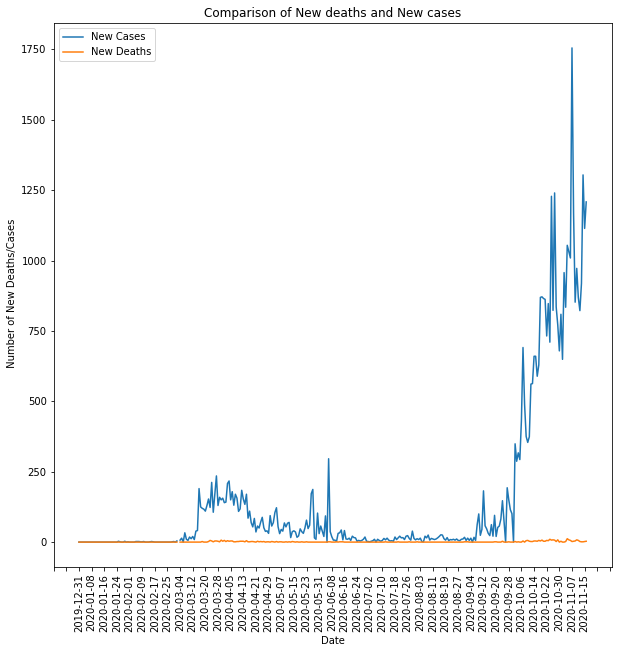

In [ ]:
# beginning date 14 Oct 2020
# end date: 16 Nov 2020

var1 = "new_cases"
var2 = "new_deaths"
label1 = "New Cases"
label2 = "New Deaths"
ylabel=" Number of New Deaths/Cases"
title= "Comparison of New deaths and New cases"

plotLineChartTwoVars(dfMy,title,var1,var2,label1,label2,ylabel)

Looking at the graph above, it appears that there is a large disparity between the rate of new deaths and new cases. As despite the massive spikes in "new cases", the increase in "new deaths" also remain significantly lower in comparison. 



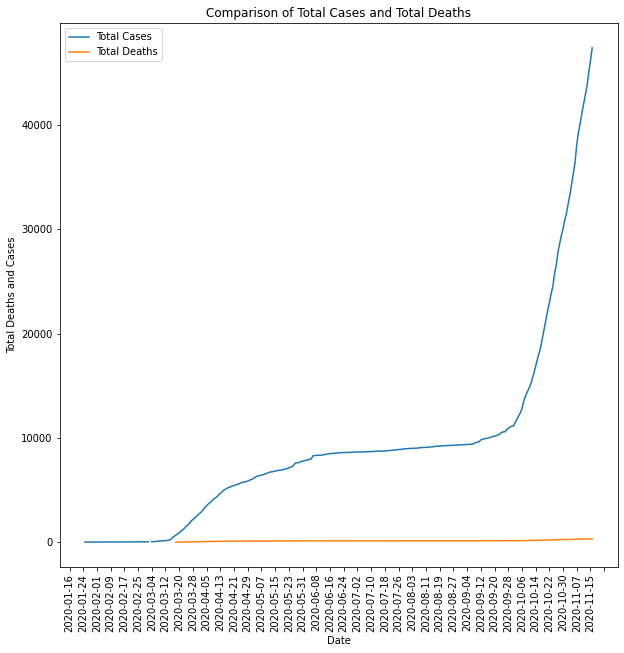

In [ ]:
# beginning date 14 Oct 2020
# end date: 16 Nov 2020

var1 = 'total_cases'
var2 = 'total_deaths'
label1 = "Total Cases"
label2 = "Total Deaths"
ylabel="Total Deaths and Cases"
xlabel="Date"
title="Comparison of Total Cases and Total Deaths"

plotLineChartTwoVars(dfMy,title,var1,var2,label1,label2,ylabel)

When looking at the total cases and deaths, the difference becomes even more apparent as seen in the graph below. As the total number of cases is ever increasing, while the total deaths remain somewhat stagnant.  

Going to the metadata analysis, a variable that stood out as interesting was the **stringency index**. 


After performing some quick research on what the **stringency index** was, according to Civils Daily, it is defined as the "*effectiveness of the nationwide lockdown and its shortcomings*", represented as a number between 0 (no restrictions) and 100 (heavy restriction/complete lockdown). 

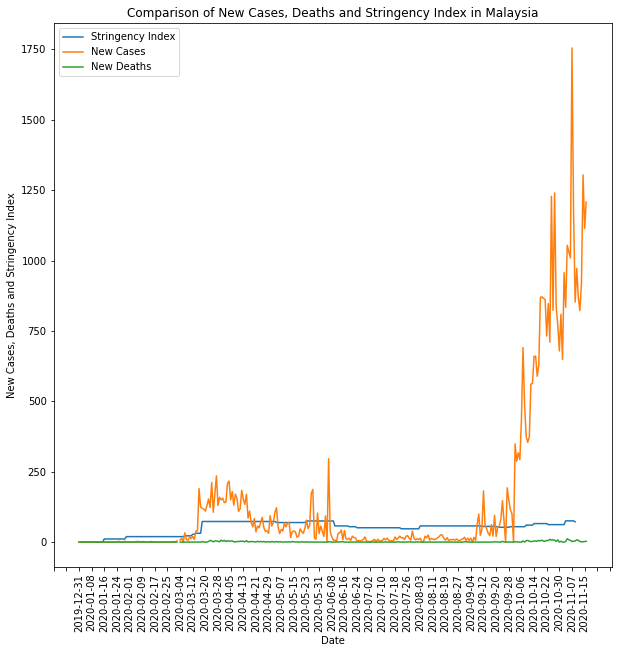

In [ ]:
# beginning date: 4 Oct 2020
# end date: 6 Nov 2020

var1 = 'stringency_index'
var2 = 'new_cases'
var3 = 'new_deaths'
label1 = "Stringency Index"
label2 = "New Cases"
label3 = "New Deaths"
ylabel= "New Cases, Deaths and Stringency Index"
title= "Comparison of New Cases, Deaths and Stringency Index in Malaysia"

plotLineChartThreeVars(dfMy,title,var1,var2,var3,label1,label2,label3,ylabel)

Knowing what the stringency index is, and looking at the graph, it appears that the Malaysian government may have imposed harsher restrictions during periods where the rate of new cases was higher. As the stringency index seems to peak following spikes in new cases.

In regards to the suppression of new cases, it did seems that the increase in new cases was noticeably suppressed after the spike around *08-06-2020*, and remained relatively low, before the sudden spike after *04-09-2020*. 

Looking at new deaths, at first glance, it appears to be universally low. However, when examining the graph more closely, it seems that new deaths appear to spike following the spike of new cases. But the proportion of deaths in comparison to new cases are still significant. 

One possible area to investigate is, whether these low number of new deaths could be attributed to the increase in restrictions, 
*i.e. higher stringency index = new deaths?*

## Exploratory Analysis of Stringency Index

To gain a better understanding of the stringency index, a quick investigation was performed on this variable. The code below creates a new dataframe that only contains the date, new_cases, new_deaths and stringency index for Malaysia. 

Using the new dataframe, the maximum and minimum non-zero stringency index was calculated.

In [ ]:
# beginning date 14 Oct 2020
# end date: 4 Nov 2020

# Create a new dataframe with columns date, new_cases, new_deaths and stringency_index for Malaysia
dfStrinIndex = pd.DataFrame(dfMy,columns=['date','new_cases','new_deaths','stringency_index']) 

# Filter out stringency index >0 
strin_index = dfMy[dfStrinIndex['stringency_index'] > 0]

# store the stringency_index row
strin_index = strin_index["stringency_index"]

# calculate max and min stringency_index
max_strin_index = strin_index.max()
min_strin_index = strin_index.min()

# print min and max 
print("Max Stringency Index: %0.02f" %(max_strin_index))
print("Min Stringency Index (Excluding null values): %0.02f" %(min_strin_index))

Max Stringency Index: 75.46
Min Stringency Index (Excluding null values): 11.11


The values above thus represent the "strictest" the country has been and the most lenient it has been (excluding instances when it was 0, as that would indicate no restrictions whatsoever).  

The code below simply displays the dataframe with all the times the stringency index was at its highest in Malaysia.

In [ ]:
# beginning date 6 Nov 2020
# end date: 7 Nov 2020

#show all entries with a stringency of 75
strin_index = dfStrinIndex[dfStrinIndex['stringency_index'] == 75]
strin_index

,date,new_cases,new_deaths,stringency_index
37459,2020-05-23,78.0,1.0,75.0
37460,2020-05-24,48.0,0.0,75.0
37461,2020-05-25,60.0,0.0,75.0
37462,2020-05-26,172.0,0.0,75.0
37463,2020-05-27,187.0,0.0,75.0
37464,2020-05-28,15.0,0.0,75.0
37465,2020-05-29,10.0,0.0,75.0
37466,2020-05-30,103.0,0.0,75.0
37467,2020-05-31,30.0,0.0,75.0
37468,2020-06-01,57.0,0.0,75.0


Looking at the table above, it seems that when the stringency index was at its highest, the rate of new cases appears to fluctuate a fair amount, going as low as **0** new cases to peaking at **296**. However, the new deaths never seem to exceed 1. Looking at these numbers, they may be some evidence that indicates that increased restrictions may contribute to lower death rates, but more analysis needs to be done before a conclusion can be made. 

Based on some background research, it appears that these spikes in cases were as a result of outbreaks amongst prinson inmates and staff ([source here](https://www.malaymail.com/news/malaysia/2020/10/07/1126-active-covid-19-cases-recorded-in-prisons-nationwide/1910299)). However, this is more of an indicator of poor management by the Malaysian government and does not provide much insight into the reasons for the low death rates in Malaysia.  

When looking for the highest amount of deaths reported in a single day, it was surprising to see that the number of new deaths peaked at "only" 7, and this was during a period where the stringency index was at one of its highest at **73.5** (highest at 75).


In [ ]:
# beginning date 6 Nov 2020
# end date: 7 Nov 2020

# show all entries where deaths were greater than... (had to keep adjusting to find values to show because they were so low)
strin_index = dfStrinIndex[dfStrinIndex['new_deaths'] > 5 ]
strin_index

,date,new_cases,new_deaths,stringency_index
37398,2020-03-23,123.0,6.0,73.15
37405,2020-03-30,150.0,7.0,73.15
37407,2020-04-01,140.0,6.0,73.15
37599,2020-10-10,354.0,6.0,60.19
37606,2020-10-17,629.0,6.0,65.74
37608,2020-10-19,871.0,7.0,65.74
37611,2020-10-22,732.0,6.0,65.74
37613,2020-10-24,710.0,10.0,62.04
37614,2020-10-25,1228.0,7.0,62.04
37615,2020-10-26,823.0,8.0,62.04


Despite having a low amount of new deaths (7) during a period where the stringency index of the country was high (73.15). This may support the notion that having a high stringency index may lead to lower death rates.  

To get a better understanding of this, we would need to compare these values with other countries. 

Going back to the Civils Daily article, a selection of countries that appeared on the graph present at the top of the article will be used as comparisons. Namely, India (Highest at 100), Italty (Highest at 95.2), and the United States (Higheat at 66.7 in as presented in the article). Not from that list, Singapore will also be used as a comparison as it neighbours Malaysia, and has also been a country [praised for its efforts in combating the pandemic](https://www.abc.net.au/news/2020-03-31/coronavirus-singapore-how-it-fought-the-virus/12100072).

### Filter by Country
To compare the other countries, we will need to filter the data for each country into their dataframes.

In [ ]:
# beginning date 6 Nov 2020
# end date: 7 Nov 2020

# filter the dataset based on location
italy = df1['location']=='Italy' 
sg = df1['location']=='Singapore' 
india = df1['location']=='India' 
usa = df1['location']=='United States'

# store a subset of the dataframe to only Malaysia.
dfItaly = df1[italy]
dfSG = df1[sg]
dfIndia = df1[india]
dfUSA = df1[usa]

# This segment is just used to verify that the dataframes have been sucessfully loaded- leave it commented out. 
#dfItaly.head()
#dfSG.head()
#dfIndia.head()
#dfUSA.head()

In [ ]:
# beginning date 6 Nov 2020
# end date: 7 Nov 2020

si_my = dfMy["stringency_index"].max()
si_sg = dfSG["stringency_index"].max()
si_it = dfItaly["stringency_index"].max()
si_us = dfUSA["stringency_index"].max()
si_in = dfIndia["stringency_index"].max()

print("Max Stringency Index United States:",(si_us))
print("Max Stringency Index Malaysia:",(si_my))
print("Max Stringency Index Singapore:",(si_sg))
print("Max Stringency Index Italy:",(si_it))
print("Max Stringency Index India:",(si_in))

Max Stringency Index United States: 72.69
Max Stringency Index Malaysia: 75.46
Max Stringency Index Singapore: 85.19
Max Stringency Index Italy: 93.52
Max Stringency Index India: 100.0


Because the number of new reported cases and deaths will drastically differ between these countries, due to the difference in population sizes, as such for the plots below the variables **new_cases_per_million** and **new_deaths_per_million** will be used instead of **new_cases** and **new_deaths**. 

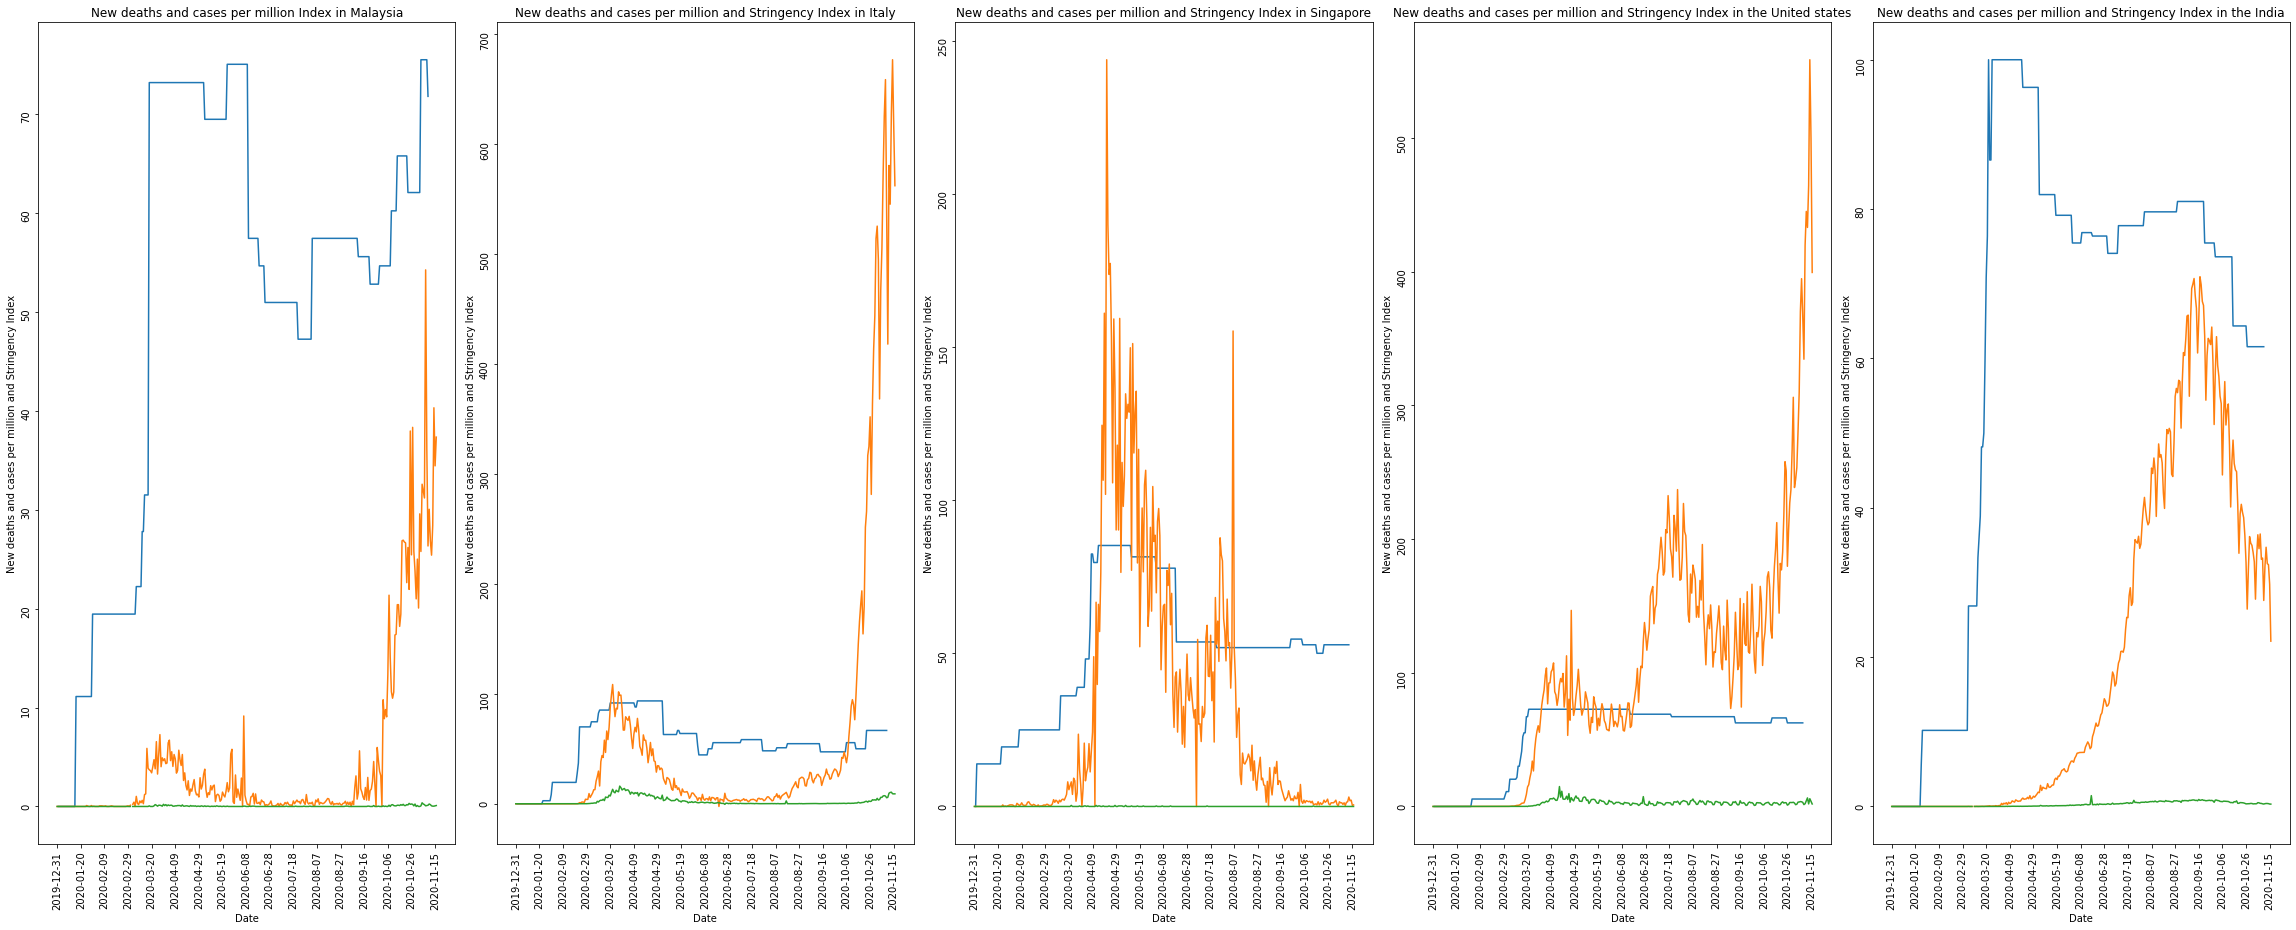

In [ ]:
# start date: 6 Nov 2020
# end date: 7 Nov 2020

fig, ax = plt.subplots(1, 5, figsize=(32, 12))
fig.tight_layout()

# Malaysian graph
ax[0].plot(dfMy['date'],dfMy['stringency_index'])
ax[0].plot(dfMy['date'],dfMy['new_cases_per_million'])
ax[0].plot(dfMy['date'],dfMy['new_deaths_per_million'])
ax[0].set(xlabel="Date",
       ylabel="New deaths and cases per million and Stringency Index",
       title="New deaths and cases per million Index in Malaysia")
ax[0].xaxis.set_major_locator(plt.MaxNLocator(20))
ax[0].tick_params(labelrotation=90)

# Italian graph
ax[1].plot(dfItaly['date'],dfItaly['stringency_index'])
ax[1].plot(dfItaly['date'],dfItaly['new_cases_per_million'])
ax[1].plot(dfItaly['date'],dfItaly['new_deaths_per_million'])
ax[1].set(xlabel="Date",
       ylabel="New deaths and cases per million and Stringency Index",
       title="New deaths and cases per million and Stringency Index in Italy")
ax[1].xaxis.set_major_locator(plt.MaxNLocator(20)) 
ax[1].tick_params(labelrotation=90)

# Singaporean graph
ax[2].plot(dfSG['date'],dfSG['stringency_index'])
ax[2].plot(dfSG['date'],dfSG['new_cases_per_million'])
ax[2].plot(dfSG['date'],dfSG['new_deaths_per_million'])
ax[2].set(xlabel="Date",
       ylabel="New deaths and cases per million and Stringency Index",
       title="New deaths and cases per million and Stringency Index in Singapore")
ax[2].xaxis.set_major_locator(plt.MaxNLocator(20)) 
ax[2].tick_params(labelrotation=90)

# United states graph
ax[3].plot(dfUSA['date'],dfUSA['stringency_index'])
ax[3].plot(dfUSA['date'],dfUSA['new_cases_per_million'])
ax[3].plot(dfUSA['date'],dfUSA['new_deaths_per_million'])
ax[3].set(xlabel="Date",
       ylabel="New deaths and cases per million and Stringency Index",
       title="New deaths and cases per million and Stringency Index in the United states")
ax[3].xaxis.set_major_locator(plt.MaxNLocator(20)) 
ax[3].tick_params(labelrotation=90)

# Indian graph
ax[4].plot(dfIndia['date'],dfIndia['stringency_index'])
ax[4].plot(dfIndia['date'],dfIndia['new_cases_per_million'])
ax[4].plot(dfIndia['date'],dfIndia['new_deaths_per_million'])
ax[4].set(xlabel="Date",
       ylabel="New deaths and cases per million and Stringency Index",
       title="New deaths and cases per million and Stringency Index in the India")
ax[4].xaxis.set_major_locator(plt.MaxNLocator(20)) 
ax[4].tick_params(labelrotation=90)

plt.show()

Looking at the trends present in the graphs above, there do not appear to be any obvious patterns. When looking at the countries where the stringency index is surpassed by **new_cases_per_million**, it seems they also suffer a more noticeable increase in **deaths_per_million**. The exception to this being Singapore, with its **deaths_per_million** appearing to be very low. 

Based on some background research, it appears that the reason for the high number of cases, but low death rates is due having the vast majority of individuals who are infected with the virus being [young and healthy migrant workers](https://www.straitstimes.com/singapore/why-spore-has-relatively-low-covid-19-death-rate). This results in them suffering less severe symptoms, and as a result, hasn't led to the healthcare system being overwhelmed. 

## Confirmatory Analysis of Age

To verify those claims mentioned in the above section, we will try to identify the countries with a higher proportion of older people. 

As stated by the [Centers for Disease Control and Prevention](https://https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/older-adults.html), "in general your risk of getting severely ill from COVID-19 increases as you get older. 8 out of 10 COVID-19 related deaths reported in the US have been among adults aged 65 years and older."

The above statement mentions that older people are more likely to die as a result of COVID-19, and this may explain the unusually high death rates in Italy and the USA. In the following code cell, we are simply using the **aged_65_older** and **aged_70_older** variables to determine which of the compared countries has a higher proportion of older people.


In [ ]:
# Start Date: 11/11/2020
# End Date: 11/11/2020

# Combine the country dataframe subsets
dfCompare = pd.concat([dfMy,dfSG,dfIndia,dfItaly,dfUSA])

# Groupby the aged_65_older and aged_70_older respectively and find the max 
# (so that you get a single value)
df_65 = dfCompare.groupby(['location'])['aged_65_older'].max()
df_70 = dfCompare.groupby(['location'])['aged_70_older'].max()

print("Aged 65 or Older")
print(df_65.sort_values(ascending=False))
print("Aged 70 or Older")
print(df_70.sort_values(ascending=False))

Aged 65 or Older
location
Italy            23.021
United States    15.413
Singapore        12.922
Malaysia          6.293
India             5.989
Name: aged_65_older, dtype: float64
Aged 70 or Older
location
Italy            16.240
United States     9.732
Singapore         7.049
India             3.414
Malaysia          3.407
Name: aged_70_older, dtype: float64


Looking at the values, it appears that Italy and the United States are the two countries with the highest proportion of older people out of the other countries compared. They also had the highest peaks in **deaths_per_million** as well. Looking at India and Malaysia, these two countries appear to have very low death rates and both these countries appear to have the lowest proportion of older people out of the other countries compared in this notebook.

All this supports the statement from the sources mentioned earlier in the process notebook. 

# Findings

When looking back at the graphs, it appears that the stringency index may serve more to suppresses the number of new cases rather than reduce the death rates. And even then, an increase in the stringency index only appears to be effective when done pre-emptively, rather than responsively. 

As seen with Italy, the stringency index appeared to rise in response to the increase in new cases and eventually gets suppressed for some time. But when the stringency index began to decrease again, the influx of new cases began to spike again. 

The opposite can be seen with India. The country was very quick to respond to the virus, and "maxed out" the stringency index as soon as new cases were being reported. But when the stringency index began decreasing, the influx of new cases began to spike greatly. 


## Malaysia

Looking at Malaysia, it appears that the low death rates were more of a result of the low proportion of old people in the country, and not as a result of increasing the stringency index.

In [ ]:
# Start date: 11/11/2020
# End date: 11/11/2020

last_date = dfMy['date'].tail(1).values
my_maxdeaths = dfMy['total_deaths'].max()
my_maxcases= dfMy['total_cases'].max()

print("Date:",(last_date))
print("Total cases :",my_maxcases)
print("Total deaths :",my_maxdeaths)

Date: ['2020-11-16']
Total cases : 47417.0
Total deaths : 309.0


Looking at the cell above, you can see that as of the 14th of October 2020. There has been "only" **163** deaths. This is a small proportion when compared to the **16880** cases the country has recorded.  

These findings suggest that COVID-19 may be deadly, but only to a certain portion of the population. 

And it may imply that most of the cases in the country may come from younger individuals who have only suffered milder symptoms and thus, had not overwhelmed the health care system in Malaysia, similair to what was seen in Singapore. 

## Uncertainty

There may be uncertainty with the accuracy in the reported number of cases.

As Malaysia has also [not enforced mandatory restrictions on Malaysian employees](https://www.freemalaysiatoday.com/category/nation/2020/10/21/covid-19-tests-for-malaysian-workers-in-red-zones-not-mandatory-says-ismail/) that work in COVID-hotspots (redzones). And mandatory testing only applies to migrant workers. 

As a result, this may mean that the number of reported cases may not accurate as people may not be getting tested. 

# References
* https://www.straitstimes.com/singapore/why-spore-has-relatively-low-covid-19-death-rate 
* https://www.civilsdaily.com/news/what-is-stringency-index/
* https://stackoverflow.com/questions/6682784/reducing-number-of-plot-ticks
* https://www.worldometers.info/coronavirus/coronavirus-death-rate/#correct
* https://www.abc.net.au/news/2020-03-31/coronavirus-singapore-how-it-fought-the-virus/12100072
* https://www.freemalaysiatoday.com/category/nation/2020/10/21/covid-19-tests-for-malaysian-workers-in-red-zones-not-mandatory-says-ismail/